[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson3/hometask/hometask_SyntheticRubber.ipynb)

In [3]:
##### При работе в Colab
!pip install yfinance requests

In [4]:
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [5]:
# Для работы с API может потребоваться обходное решение для работы с SSL сертификатом
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании.
* Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании.
* Ваши клиенты предпочитают формульный подход к ценообразованию и вам нужно предложить клиентам формулу цены на синтетический каучук, который может быть альтернативой натуральному каучуку с грейдом SMR 20.
* В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента…

In [52]:
# Из данных есть:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии)
# location - локация клиента
# volumes - закупаемые объемы
# formula - предпочитаемая формула расчета цены - скользящая средняя или среднее значение за месяц

customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'formula':'moving_average'
    },

    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'formula': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'formula': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'formula': 'monthly'
    }
}
# Скидки
#discounts = {'up to 100': 0.01, # 1%
#             'up to 300': 0.05, # 5%
#             '300 plus': 0.1}   #10%

discounts = {0: 0.01, # 1%
             100: 0.05, # 5%
             300: 0.1}   #10%                

In [53]:
# Котировки натурального каучука доступны на сайте,  https://www.lgm.gov.my
# также у них есть API, пример запроса ниже
#
year = '2022'
month = '05'
url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={month}&year={year}"
res = requests.get(url)
rj = res.json()
df = pd.json_normalize(rj)
df.head()

,date,grade,masa,rm,us,tone
0,2022-05-31,SMR CV,Noon,1157.50,269.20,Slightly steadier
1,2022-05-31,SMR L,Noon,1147.50,266.90,Slightly steadier
2,2022-05-31,SMR 5,Noon,740.00,172.10,Slightly steadier
3,2022-05-31,SMR GP,Noon,737.00,171.40,Slightly steadier
4,2022-05-31,SMR 10,Noon,730.00,169.80,Slightly steadier


In [54]:
df.grade.unique()


array(['SMR CV', 'SMR L', 'SMR 5', 'SMR GP', 'SMR 10', 'SMR 20',
       'Latex in Bulk'], dtype=object)

In [70]:
df.loc[df['grade']=='SMR 20']

,date,grade,masa,rm,us,tone
5,2022-05-31,SMR 20,Noon,728.00,169.30,Slightly steadier
12,2022-05-30,SMR 20,Noon,719.50,167.05,Steady
19,2022-05-27,SMR 20,Noon,717.50,166.05,Steady
26,2022-05-26,SMR 20,Noon,699.00,161.75,Quietly Steady
33,2022-05-25,SMR 20,Noon,704.00,163.15,Steady
40,2022-05-24,SMR 20,Noon,709.00,164.20,Steady
47,2022-05-23,SMR 20,Noon,701.00,162.50,Steady
54,2022-05-20,SMR 20,Noon,708.00,163.85,Steady
61,2022-05-19,SMR 20,Noon,703.50,162.30,Quietly Steady
68,2022-05-18,SMR 20,Noon,706.00,163.70,Steady


In [74]:
df_copy = df.copy()
#df_copy=df_copy.set_index('date')

#df_copy['date2'] = pd.to_datetime(df_copy.date)
#df_copy = df_copy.resample('M').mean()

#df_copy_g = df_copy.groupby('grade')
#mean

#df_copy_g.head(5)
df_copy_g1 = df_copy.loc[df_copy['grade']=='SMR 20']
df_copy_g1.head(5)
df_copy_g1['us_num'] = pd.to_numeric(df_copy_g1['us'])


avg_smr20 = df_copy_g1['us_num'].mean()
avg_smr20

roll_avg_smr20 = df_copy_g1['us_num'].rolling(window=3).mean()
roll_avg_smr20

C:\Users\User\AppData\Local\Temp\ipykernel_18372\25026424.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_g1['us_num'] = pd.to_numeric(df_copy_g1['us'])


5             NaN
12            NaN
19     167.466667
26     164.950000
33     163.650000
40     163.033333
47     163.283333
54     163.516667
61     162.883333
68     163.283333
75     163.283333
82     162.266667
89     160.966667
96     159.550000
103    159.550000
110    159.316667
117    159.750000
124    161.650000
Name: us_num, dtype: float64

In [75]:
df_copy_g1['MWP_PRICE_EUR_EU'] = df_copy_g1['us_num'] + EU_LOGISTIC_COST_EUR
df_copy_g1['MWP_PRICE_USD_CN'] = df_copy_g1['us_num'] + CN_LOGISTIC_COST_USD
df_copy_g1['MWP_PRICE_EUR_EU_MA'] = df_copy_g1.us_num.rolling(window=3).mean()

df_copy_g1.head(5)


C:\Users\User\AppData\Local\Temp\ipykernel_18372\738181823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_g1['MWP_PRICE_EUR_EU'] = df_copy_g1['us_num'] + EU_LOGISTIC_COST_EUR
C:\Users\User\AppData\Local\Temp\ipykernel_18372\738181823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_g1['MWP_PRICE_USD_CN'] = df_copy_g1['us_num'] + CN_LOGISTIC_COST_USD
C:\Users\User\AppData\Local\Temp\ipykernel_18372\738181823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,date,grade,masa,rm,us,tone,us_num,MWP_PRICE_EUR_EU,MWP_PRICE_USD_CN,MWP_PRICE_EUR_EU_MA
5,2022-05-31,SMR 20,Noon,728.00,169.30,Slightly steadier,169.30,199.30,299.30,NaN
12,2022-05-30,SMR 20,Noon,719.50,167.05,Steady,167.05,197.05,297.05,NaN
19,2022-05-27,SMR 20,Noon,717.50,166.05,Steady,166.05,196.05,296.05,167.466667
26,2022-05-26,SMR 20,Noon,699.00,161.75,Quietly Steady,161.75,191.75,291.75,164.950000
33,2022-05-25,SMR 20,Noon,704.00,163.15,Steady,163.15,193.15,293.15,163.650000


In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

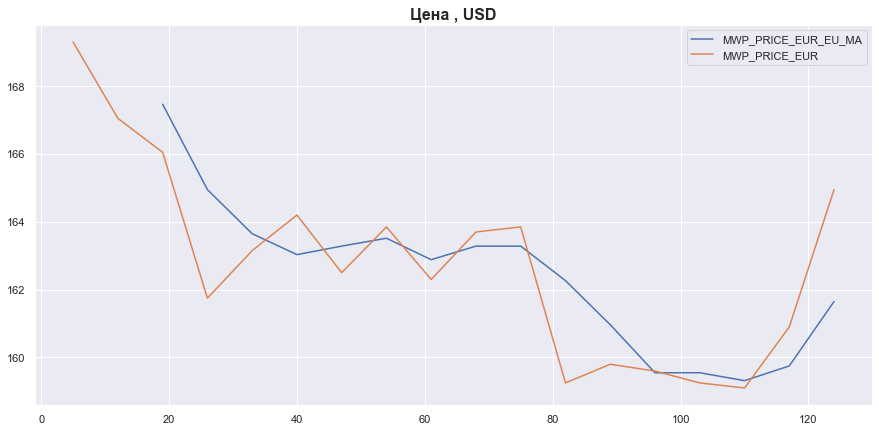

In [43]:
# График с базовой ценой(на заводе) в евро
plt.title('Цена , USD', fontsize=16, fontweight='bold')
plt.plot(df_copy_g1['MWP_PRICE_EUR_EU_MA'], label='MWP_PRICE_EUR_EU_MA')
plt.plot(df_copy_g1['us_num'], label='MWP_PRICE_EUR')
plt.legend()
plt.show()

In [77]:
import os


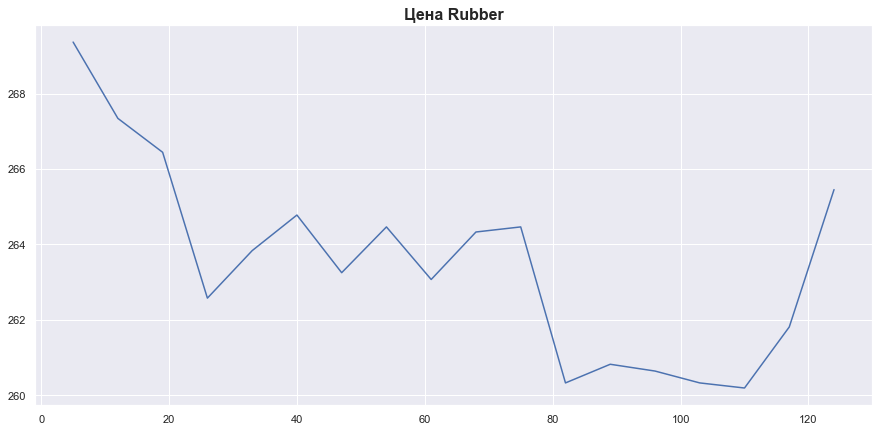

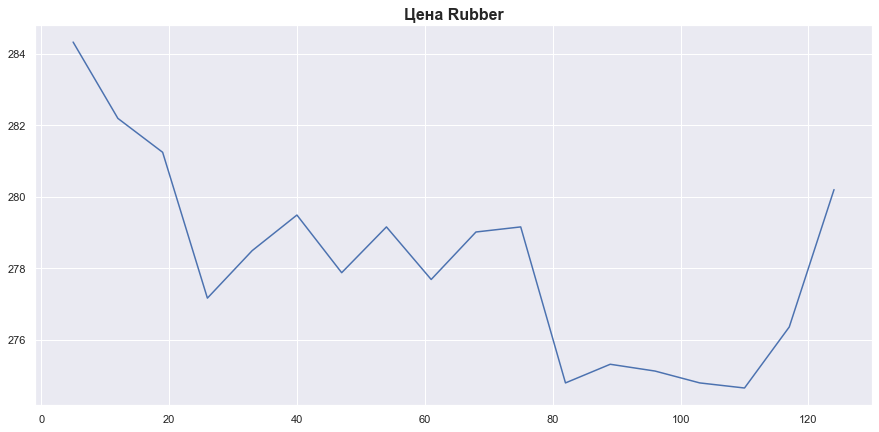

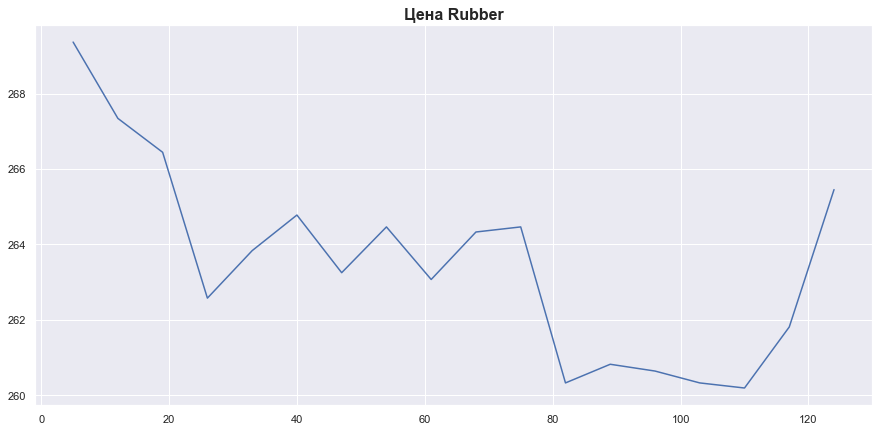

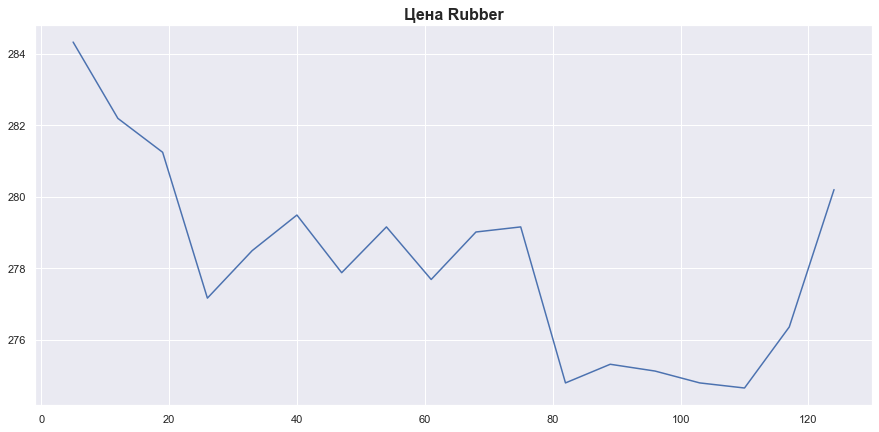

In [78]:
with pd.ExcelWriter('price_proposals.xlsx', engine = 'xlsxwriter') as writer:
    for client, v in customers.items():

        disc = 0.0
        if v.get('location') == "EU":
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))

            if v.get('comment') == 'monthly':
                client_price = df_copy_g1['MWP_PRICE_EUR_EU'] * (1-disc)
            elif v.get('comment') == 'moving_average':
                client_price = df_copy_g1['MWP_PRICE_EUR_EU_MA'] * (1-disc)

        elif v.get('location') == 'CN':
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))
        client_price = df_copy_g1['MWP_PRICE_USD_CN'] * (1-disc)

            #client_price = df_copy_g1['MWP_PRICE_USD_CN'] * (1-disc)

        # print(client, v, disc)
        client_price.to_excel(writer, sheet_name=client)
        # Добавляем график с ценой
        plot_path = f'{client}_wbp.png'
        plt.title('Цена Rubber', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        # worksheet = writer.sheets[client]
        # worksheet.insert_image('C2',plot_path)

    for k,v in customers.items():
        worksheet = writer.sheets[k]
        worksheet.insert_image('C2',f"{k}_wbp.png")

for k,v in customers.items():
    if os.path.exists(f"{k}_wbp.png"):
        os.remove(f"{k}_wbp.png")

In [79]:
v.get('volumes')
customers.items()

discounts.items()

dict_items([(0, 0.01), (100, 0.05), (300, 0.1)])

In [80]:
# Создаем директорию для ценовых предложений клиентам
price_proposals_path = 'client_wbp_price_proposals'
if not os.path.exists(price_proposals_path):
    os.mkdir(price_proposals_path)

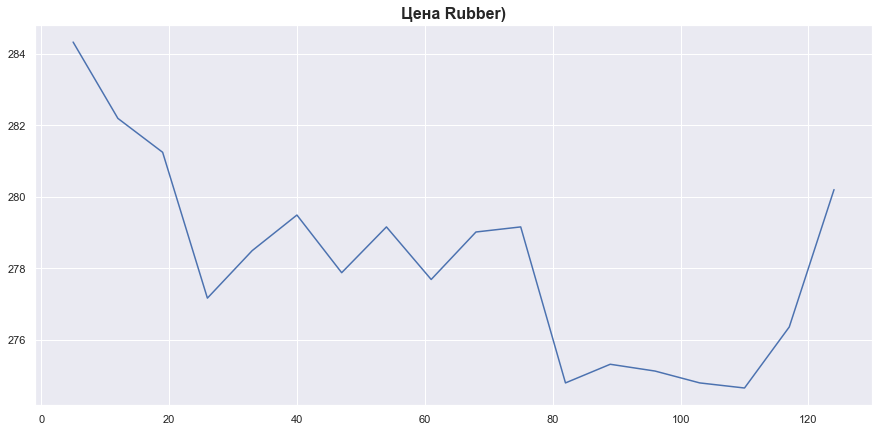

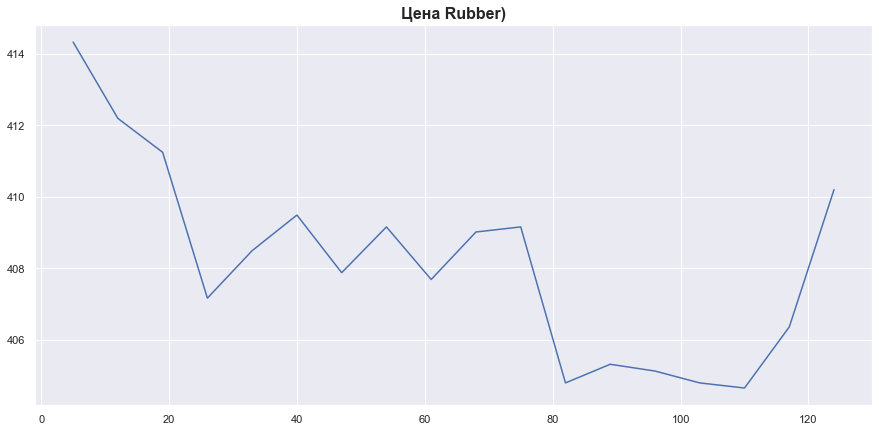

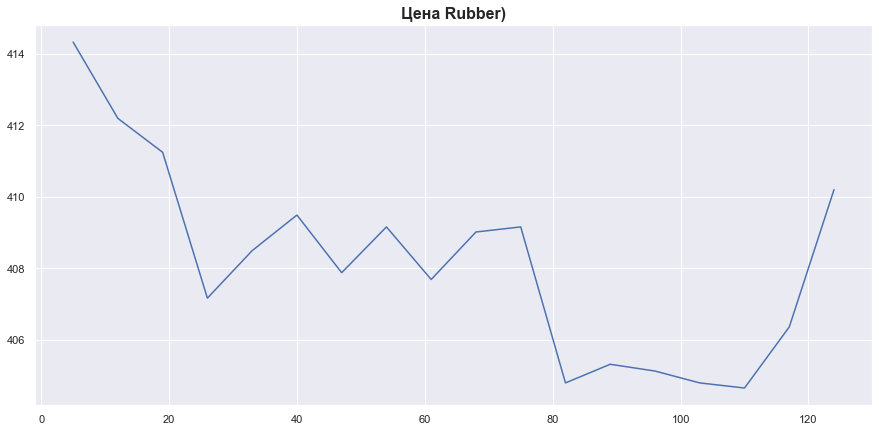

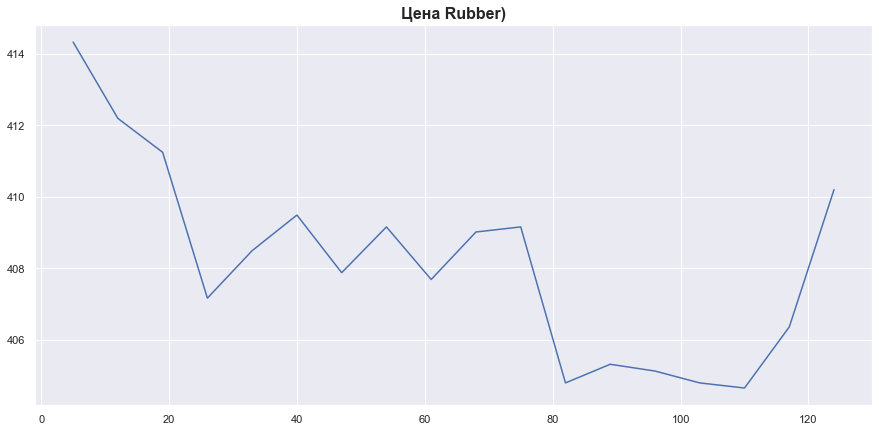

In [81]:
# Создаем отдельный файл для каждого из клиентов
for client, v in customers.items():
    client_proposal_file_path = os.path.join(price_proposals_path, f'{client}_mwp_price_proposal.xlsx')
    location = v.get('location')
    disc = 0.0
    if v.get('location') == "EU":
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        if v.get('comment') == 'monthly':
            client_price = df_copy_g1['MWP_PRICE_EUR_EU'] * (1-disc) + EU_LOGISTIC_COST_EUR
        elif v.get('comment') == 'moving_average':
            client_price = df_copy_g1['MWP_PRICE_EUR_EU_MA'] * (1-disc) + EU_LOGISTIC_COST_EUR

    elif v.get('location') == 'CN':
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        client_price = df_copy_g1['MWP_PRICE_USD_CN'] * (1-disc) + CN_LOGISTIC_COST_USD
    with pd.ExcelWriter(client_proposal_file_path, engine='xlsxwriter') as writer:
        client_price.to_excel(writer, sheet_name='price_proposal')
        # Добавляем график с ценой
        plot_path = f'{client}_wbp.png'
        plt.title('Цена Rubber)', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        worksheet = writer.sheets['price_proposal']
        worksheet.insert_image('C2',plot_path)

for k,v in customers.items():
    if os.path.exists(f"{k}_wbp.png"):
        os.remove(f"{k}_wbp.png")

# Задание 2. Продолжение

Клиенты согласились на ваше предложение.
### Что нужно сделать?
Вам нужно написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно.



* В результате должен быть скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

# Задание 3. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

### Что нужно сделать?
* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ
* Помните о PEP8

In [3]:
# import yourpackage

# Задание 4. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

### Что нужно сделать?
* Создайте отдельный пакет, который можно устанавливать с помощью pip
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в свой репозиторий

In [ ]:
# !pip install yourpackage
# import yourpackage